## IMPORTAÇÃO DE BIBLIOTECAS:

In [44]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
from scipy.stats import uniform, expon, norm, probplot, percentileofscore, poisson, binom

## IMPORTANDO O DATAFRAME:

In [45]:
steam = pd.read_csv("steam-store-games/steam.csv")

## DEFINIÇÃO DE FUNÇÕES:

In [46]:
def separa_por_genero(genero):
    dfx = steam['genres'].str.contains(genero)
    df_saida = pd.DataFrame(dfx)
    df_saida = df_saida.rename(columns = {'genres':genero})
    df_saida = df_saida.join(steam, how='inner', lsuffix=' ', rsuffix=' ')
    df_saida = df_saida.loc[df_saida[genero] == True]
    return df_saida

def loc_price(genres, min_price, max_price):
    dataframe = separa_por_genero(genres)
    dataframe = dataframe.loc[(dataframe['price'] > min_price) & (dataframe['price'] < max_price)]
    return dataframe

def prob_plot(dataframe, serie):
    print('-'*100)
    print("Modelo Exponencial")
    probplot(dataframe[serie], dist="expon", plot=plt);
    plt.show()
    print('-'*100)
    print("Modelo Normal")
    probplot(dataframe[serie], dist="norm", plot=plt);
    plt.show()
    print('-'*100)
    return ' '


In [47]:
price = steam["price"]
positive = steam["positive_ratings"]
negative = steam["negative_ratings"]
i = 0
total = 27075
percent_positive = []
percent_negative = []
percent_p = 0
percent_n = 0
while i <= 27074:
    percent_p = positive[i]/(positive[i] + negative[i])
    percent_n = negative[i]/(positive[i] + negative[i])
    percent_positive.append(percent_p)
    percent_negative.append(percent_n)
    i += 1
    
line = range(0, 27074)

df_percent_positive = pd.DataFrame(percent_positive)
df_test = df_percent_positive.join(steam, how='inner', lsuffix=' ', rsuffix=' ')
df_test = df_test.rename(columns = {0:'Percent_Positive'})
df_test


,Percent_Positive,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
0,0.973888,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,124534,3339,17612,317,10000000-20000000,7.19
1,0.839787,20,Team Fortress Classic,1999-04-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,3318,633,277,62,5000000-10000000,3.99
2,0.895648,30,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,FPS;World War II;Multiplayer,0,3416,398,187,34,5000000-10000000,3.99
3,0.826623,40,Deathmatch Classic,2001-06-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,1273,267,258,184,5000000-10000000,3.99
4,0.947996,50,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,FPS;Action;Sci-fi,0,5250,288,624,415,5000000-10000000,3.99
5,0.801278,60,Ricochet,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Valve Anti-Ch...,Action,Action;FPS;Multiplayer,0,2758,684,175,10,5000000-10000000,3.99
6,0.961878,70,Half-Life,1998-11-08,1,Valve,Valve,windows;mac;linux,0,Single-player;Multi-player;Online Multi-Player...,Action,FPS;Classic;Action,0,27755,1100,1300,83,5000000-10000000,7.19
7,0.893871,80,Counter-Strike: Condition Zero,2004-03-01,1,Valve,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,Action;FPS;Multiplayer,0,12120,1439,427,43,10000000-20000000,7.19
8,0.900990,130,Half-Life: Blue Shift,2001-06-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player,Action,FPS;Action;Sci-fi,0,3822,420,361,205,5000000-10000000,3.99
9,0.965601,220,Half-Life 2,2004-11-16,1,Valve,Valve,windows;mac;linux,0,Single-player;Steam Achievements;Steam Trading...,Action,FPS;Action;Sci-fi,33,67902,2419,691,402,10000000-20000000,7.19


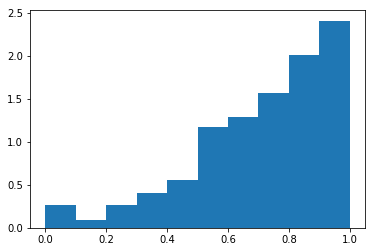

In [52]:
plt.hist(df_test["Percent_Positive"], bins = 10, density = True);

In [48]:
df_test2["ratings"] = df_test2["positive_ratings"] + df_test2["negative_ratings"]
generos = df_test2.genres.str.cat(sep=";")
generos = generos.split(";")
lista_generos = []
for i in generos:
    if i not in lista_generos:
        lista_generos.append(i)
lista_software = ["Animation & Modeling", "Web Publishing", "Design & Illustration", "Early Access", "Utilities", "Video Production", "Nudity", "Photo Editing", "Accounting", "Game Development", "Free to Play", "Audio Production", "Tutorial", "Sexual Content", "Education", "Software Training", "Documentary"]
for i in lista_software:
    if i in lista_generos:
        lista_generos.remove(i)
lista_generos

['Action',
 'Strategy',
 'Adventure',
 'Indie',
 'RPG',
 'Casual',
 'Simulation',
 'Racing',
 'Violent',
 'Massively Multiplayer',
 'Sports',
 'Gore']

In [49]:
n_cat = []
for i in df_test2.categories:
    n_cat.append(i.count(";")+1)
df_test2["n_cat"] = pd.Series(n_cat)

In [50]:
df_test2.corr()

,Percent_Negative,appid,english,required_age,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,price,ratings,n_cat
Percent_Negative,1.000000,0.022049,0.017599,-0.010254,0.022420,-0.030240,-0.000776,-0.020407,-0.013233,-0.076455,-0.025750,-0.166592
appid,0.022049,1.000000,-0.116878,-0.087740,0.040510,-0.070888,-0.052198,-0.070236,-0.048308,-0.152112,-0.069987,-0.249821
english,0.017599,-0.116878,1.000000,0.002860,0.014121,0.006001,0.005705,0.000338,-0.003416,0.007716,0.006171,0.075321
required_age,-0.010254,-0.087740,0.002860,1.000000,-0.005459,0.060418,0.057599,0.034423,0.014748,0.120358,0.062154,0.047801
achievements,0.022420,0.040510,0.014121,-0.005459,1.000000,0.006058,0.003578,0.014175,0.009957,-0.007996,0.005813,0.003737
positive_ratings,-0.030240,-0.070888,0.006001,0.060418,0.006058,1.000000,0.762804,0.157898,0.035776,0.036110,0.992340,0.071096
negative_ratings,-0.000776,-0.052198,0.005705,0.057599,0.003578,0.762804,1.000000,0.161140,0.047887,0.051259,0.836842,0.051269
average_playtime,-0.020407,-0.070236,0.000338,0.034423,0.014175,0.157898,0.161140,1.000000,0.914900,0.049242,0.164463,0.050046
median_playtime,-0.013233,-0.048308,-0.003416,0.014748,0.009957,0.035776,0.047887,0.914900,1.000000,0.036610,0.039437,0.028004
price,-0.076455,-0.152112,0.007716,0.120358,-0.007996,0.036110,0.051259,0.049242,0.036610,1.000000,0.040363,0.186551
